In [1]:
from imutils import paths
from sklearn.model_selection import train_test_split
from keras.layers import Input, Reshape, Flatten, Dense, MaxPooling2D, Dropout, Conv2D
from keras.models import Model
import keras
import tensorflow as tf
import numpy as np
import random
import os
import matplotlib.pyplot as plt
from keras.optimizers import Adam

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
Có 60000 ảnh dùng để train và valid, 10000 ảnh dùng để test
Mỗi ảnh có một kênh màu, kích thước 28x28

Ảnh đầu tiên của tập train
Label đầu tiên của tập train:  5


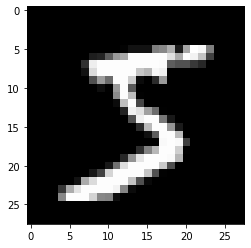

In [2]:

# Tải dataset MNIST từ tensorflow

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
## resacle ảnh thành ảnh thực trong đoạn [0,1]
X_train, X_test = X_train/255.0, X_test/255.0

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
print("Có 60000 ảnh dùng để train và valid, 10000 ảnh dùng để test")
print("Mỗi ảnh có một kênh màu, kích thước 28x28")
print()

## in thử ảnh một ảnh
print("Ảnh đầu tiên của tập train")
print("Label đầu tiên của tập train: ", y_train[0])
plt.imshow(X_train[0], cmap='gray')
plt.show()

#Tách một phần tập train thành tập valid
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1) # Tách theo tỉ lệ validation/train=1/9

**1. Tạo và huấn luyện mạng no-ron theo cấu trúc đã cho trên tập MNIST**

In [3]:
def nnet(input_size = (28,28)):
    
    inputs = Input(shape=(input_size))
    reshape_inputs = Reshape((28,28,1))(inputs)
    flatten = Flatten()(inputs)

    dense1 = Dense(units=200, activation='relu')(flatten)
    dense2 = Dense(units=100, activation='relu')(dense1)
    dense3 = Dense(units=50, activation='relu')(dense2)
    dense4 = Dense(units=20, activation='relu')(dense3)
    softmax = Dense(units=10, activation='softmax')(dense4)

    model = Model(inputs=inputs, outputs=softmax)
    return model

In [4]:
# Define model
model = nnet()
model.compile(optimizer='adam',
             loss=tf.keras.losses.sparse_categorical_crossentropy,
             metrics=["accuracy"])

In [5]:
# Model architecture
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 200)               157000    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_3 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                210   

**2. Nêu cách tính số parameters sau mỗi layer**

Cách tính Param #: tổng số connections (paremeters) giữa các node ở lớp layer trước và hiện tại + số biases

        dense = 784 (nodes) x 200 (nodes) + 200 (bias) = 157000

        dense_1 = 200 (nodes) x 100 + 100 (bias) = 20100

        dense_2 = 100 (nodes) x 50 + 50 (bias) = 5050

        dense_3 = 50 (nodes) x 20 + 20 (bias) = 1020

        dense_4 = 20 (nodes) x 10 + 10 (bias) = 210


**3. Cấu trúc ở câu 1 có thể được áp dụng cho bài toán regression được không, nếu có thì phải thay đổi như thế nào?**

Trả lời: Có, cần thay đổi lớp Fully-connected layer cuối (dense_4) với số units=1 và activation='linear'.

In [6]:
# Training model
num_epochs = 20
batchsize = 100

history = model.fit(X_train,y_train,
                  epochs=num_epochs,
                  batch_size=batchsize,
                  validation_data=(X_valid,y_valid))

Epoch 1/20
540/540 [==============================] - 13s 3ms/step - loss: 0.6228 - accuracy: 0.8133 - val_loss: 0.1427 - val_accuracy: 0.9580
Epoch 2/20
540/540 [==============================] - 1s 2ms/step - loss: 0.1218 - accuracy: 0.9628 - val_loss: 0.1176 - val_accuracy: 0.9642
Epoch 3/20
540/540 [==============================] - 1s 2ms/step - loss: 0.0814 - accuracy: 0.9759 - val_loss: 0.0866 - val_accuracy: 0.9735
Epoch 4/20
540/540 [==============================] - 1s 2ms/step - loss: 0.0578 - accuracy: 0.9815 - val_loss: 0.0901 - val_accuracy: 0.9722
Epoch 5/20
540/540 [==============================] - 1s 2ms/step - loss: 0.0429 - accuracy: 0.9871 - val_loss: 0.0744 - val_accuracy: 0.9772
Epoch 6/20
540/540 [==============================] - 1s 2ms/step - loss: 0.0345 - accuracy: 0.9892 - val_loss: 0.0796 - val_accuracy: 0.9767
Epoch 7/20
540/540 [==============================] - 1s 2ms/step - loss: 0.0258 - accuracy: 0.9919 - val_loss: 0.1028 - val_accuracy: 0.9708
Epoch

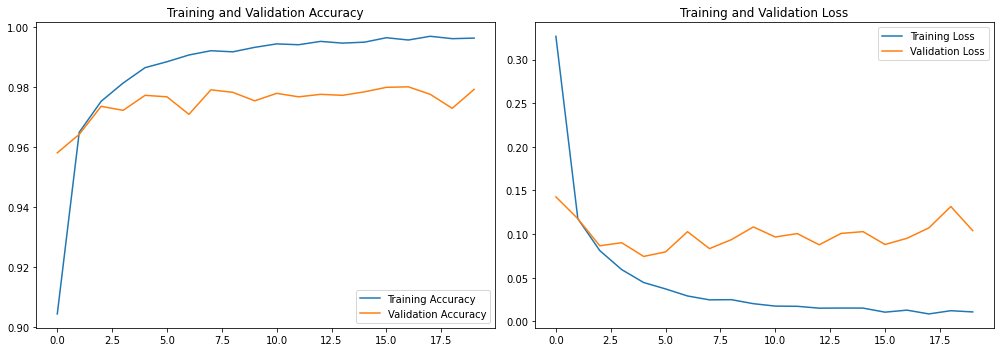

In [7]:
# Visualization
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(num_epochs)

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.tight_layout()
plt.show()

In [8]:
# Prediction 
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Loss trên tập test: ", test_loss," Accuracy trên tập test: ", test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1164 - accuracy: 0.9770
Loss trên tập test:  0.11640291661024094  Accuracy trên tập test:  0.9769999980926514


**Câu 4: Thiết kế một mạng Convolution 2D cho trước**


In [9]:
def conv2D(input_size=(28,28)):
    inputs = Input(shape=input_size)

    reshape_input = Reshape((28,28,1))(inputs)

    conv1 = Conv2D(20, 5, activation = 'relu', padding='same')(reshape_input)

    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(20, 5, activation = 'relu')(pool1)

    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    flatten = Flatten()(pool2)

    dense1 = Dense(units=40, activation='relu')(flatten)

    dense2 = Dense(units=20, activation='relu')(dense1)

    softmax = Dense(units=10, activation='softmax')(dense2)

    model = Model(inputs=inputs, outputs=softmax)
    
    return model

In [11]:
# Model
model = conv2D()

# Model architecture
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
reshape_2 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 20)        520       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 20)        10020     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 20)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 500)               0   